# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


In [2]:
Type = 'Clustering'

In [3]:
group_id = 'Group_17'

In [4]:
student_name = 'Shashikanth Senthil Kumar'

In [5]:
student_id = '25218722'

<hr>

## B. Business Understanding


business_use_case:

Customer Segmentation Based on Spending Habits:
* Segment customers into distinct groups based on their spending behaviors, including transaction frequency, total spending, merchant preferences, and transaction amounts. This segmentation will help identify high and low spenders, as well as reveal patterns in customer behavior across different merchant categories and timeframes.
* Use of the Model: The clustering model will be used to automatically categorize customers into meaningful segments based on their spending habits. By grouping customers with similar behaviors, the model enables the business to tailor marketing, customer engagement, and risk management strategies. Additionally, the model can be periodically updated with new transaction data to adjust customer segments, ensuring that the business maintains up-to-date insights on customer behavior.

business_expectations:
1. Customer Segmentation: Identify high and low spenders to tailor marketing, promotions, and customer engagement strategies.
2. Targeted Campaigns: Optimize marketing efforts by creating targeted offers for different customer spending groups.
3. Customer Retention and Experience: Enhance retention by personalizing experiences based on spending behavior and preferences.
4. Revenue Growth: Increase profitability through optimized product offerings, upselling, and cross-selling strategies.

<hr>

## C. Data Understanding


### C.0 Import Packages

In [6]:
# Pandas for data handling
import pandas as pd

# Altair for plotting
import altair as alt

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

<hr>

### C.1   Load Datasets

In [7]:
# Load the Dataset
df_male=pd.read_csv('adults_2550_male.csv')

<hr>

### C.2 Define Target variable

### Clustering in Unsupervised Learning

In unsupervised learning tasks such as clustering, there is **no target variable**. The objective is to group data points based on similarities within the feature set, without the need for prior labels. The goal is to discover inherent patterns or structures in the data by clustering similar items together, allowing for insights such as customer segmentation, anomaly detection, or pattern recognition.

In this specific case, we are applying clustering techniques to segment customers based on their **spending patterns**. By grouping customers with similar spending behaviors, we aim to provide valuable insights that can help the marketing team tailor campaigns, promotions, and personalized offers to different customer segments. This approach will enable more effective targeting of high and low spenders, leading to improved customer engagement and business outcomes. 

By identifying distinct groups of customers, we help uncover underlying spending trends, allowing the business to optimize its marketing strategies and improve customer satisfaction.


<hr>

### C.3 Explore Target variable

In the context of our clustering model, there is no direct **target variable** since clustering is an unsupervised learning task. Instead of predicting a specific outcome, the goal is to group customers based on similar characteristics, such as their **spending patterns**, transaction frequencies, and merchant engagement.

However, even in the absence of a traditional target variable, we can consider the clusters themselves as a form of target variable. Once the model has clustered customers, these clusters can serve as a proxy for understanding different customer segments. By examining the characteristics of each cluster, we can derive insights into:

1. **High spenders**: Customers who spend large amounts consistently, providing opportunities for premium offers and loyalty programs.
2. **Low spenders**: Customers with lower spending habits, who might benefit from targeted promotions to increase their transaction volume.

These insights help marketing teams craft more tailored strategies to enhance customer acquisition, retention, and overall revenue generation. While not a typical target variable, the cluster assignments guide targeted actions based on customer behavior patterns.


<hr>

### C.4 Explore Variables of Interest


#### C.4.a Feature "amt_log"

In [8]:
# Display the summary Statistics
df_male['amt_log'].describe()

count    232877.000000
mean          3.340424
std           1.271814
min           0.693147
25%           2.213754
50%           3.685122
75%           4.271933
max          10.133047
Name: amt_log, dtype: float64

Text(-12.805555555555555, 0.5, 'Frequency')

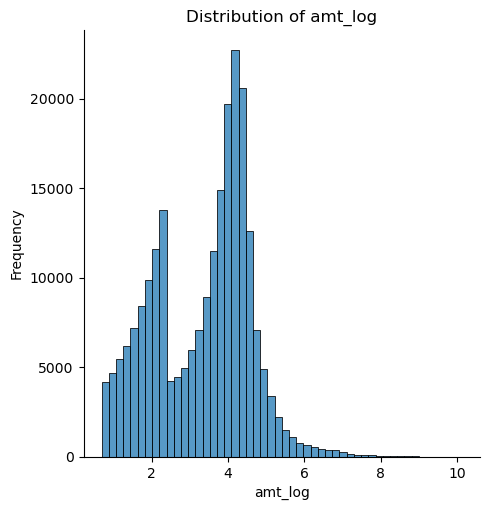

In [9]:
# create a distplot to see the distribution of amt_log
sns.displot(x='amt_log',data=df_male,bins=50)
plt.title('Distribution of amt_log')
plt.xlabel('amt_log')
plt.ylabel('Frequency')

> Insights: 
* The amt_log distribution plot reveals the distribution of amt column after applying a logarithmic transformation.
* The data appears to be concentrated around a specific range, indicating that most transactions have a similar magnitude in terms of log-transformed amounts, likely toward the lower-to-mid range of the transformed scale.
* The logarithmic transformation typically reduces the skewness of monetary data, making patterns clearer for analysis and aiding in downstream clustering models.

> Considerations:
* The log transformation compresses high spending values, which may reduce sensitivity to extreme transaction amounts and impact the model’s ability to clearly differentiate between high and low spenders, potentially affecting the segmentation of high-value customers.
* If the data has zero or negative values before transformation, these should be handled separately as log transformation only applies to positive numbers.

> Issues found: 
* Skewness: Despite the log transformation, the distribution may still be right-skewed if there are significantly high-value transactions, possibly requiring further scaling or normalization.
* Interpretability: Log-transformed values can be less interpretable in direct business terms, as the raw transaction amount is no longer apparent in this form.

#### C.4.b Feature "merchant"

In [10]:
# Display the summary Statistics
df_male['merchant'].describe()

count          232877
unique          21934
top       Johnson LLC
freq              349
Name: merchant, dtype: object

In [11]:
# Display the count of unique values
df_male['merchant'].value_counts()

merchant
Johnson LLC                   349
Smith PLC                     349
Smith Inc                     310
Johnson Inc                   298
Smith and Sons                274
                             ... 
Case, Turner and Gardner        1
Smith, Herman and Castillo      1
Morgan, Smith and Chen          1
Wells, Hunt and Garrison        1
Phillips-Campbell               1
Name: count, Length: 21934, dtype: int64

Text(0.5, 1.0, 'Top 20 Merchants by Transaction Count')

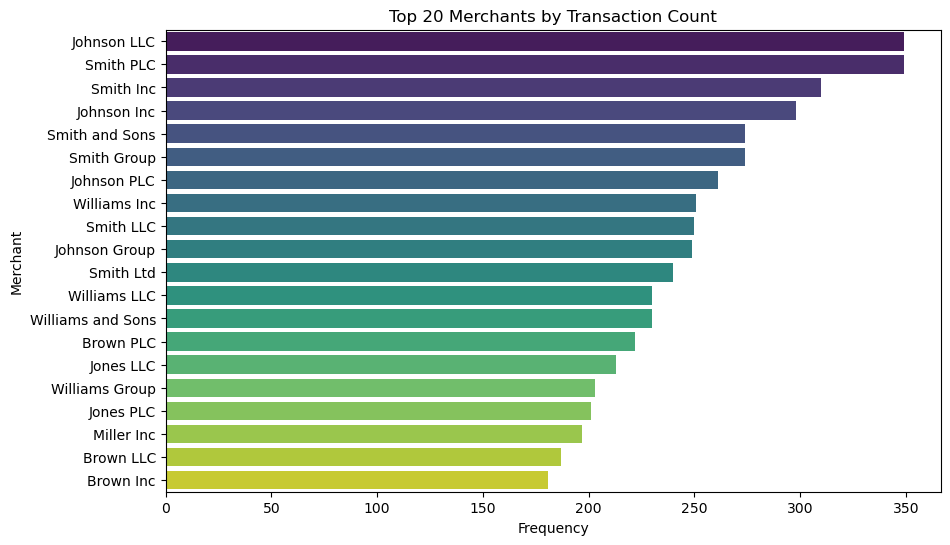

In [12]:
# Get the top 20 merchants by transaction frequency
top_20_merchants = df_male['merchant'].value_counts().index[:20]

# Create a count plot for the 'merchant' column with the top 20 only
plt.figure(figsize=(10, 6))
sns.countplot(data=df_male, y='merchant', palette="viridis", order=top_20_merchants)
plt.xlabel("Frequency")
plt.ylabel("Merchant")
plt.title("Top 20 Merchants by Transaction Count")

> Insights: 
* The top 20 merchants with the highest transaction counts show significant concentration, with companies like "Johnson LLC" and "Smith PLC" having the highest frequencies.
* A few merchants dominate the transaction volume, indicating potentially high customer loyalty or preference for certain merchants, or possibly even an imbalance in transaction records among merchants.

> Considerations:
* Business Strategy: Clustering customers based on spending patterns allows the business to tailor marketing strategies by targeting high spenders with premium offers and low spenders with incentives to increase engagement. By understanding customer segments, the business can design personalized promotions to drive customer loyalty.
* Customer Segmentation: Identifying distinct spending behaviors enables segmentation that can inform customer retention efforts, such as rewarding frequent shoppers or encouraging inactive customers to increase spending.
* Optimized Product/Service Offerings: By understanding the purchasing behavior of different clusters, the business can optimize its product offerings, pricing strategies, and inventory management based on customer preferences.
* Revenue Growth: With insights into high and low spenders, the business can implement up-selling and cross-selling strategies to increase overall revenue and profitability by offering tailored products or services to each segment.


> Issues found:
* High Cardinality: With over 21,000 unique merchants, the high cardinality may make it challenging to analyze all merchants directly. This could also impact model performance, so dimensionality reduction (e.g., focusing on top merchants or aggregating similar merchants) might be required.
* Overrepresentation: The dominance of a few merchants could bias clustering and other analyses toward the behaviors associated with these top merchants, potentially masking trends or behaviors from lesser-used merchants.

#### C.4.c Feature "total_amt"

In [13]:
# Display the summary Statistics
df_male['total_amt'].describe()

count    232877.000000
mean      79792.154555
std       28143.982915
min       17510.070000
25%       61676.660000
50%       83676.370000
75%      101418.680000
max      139655.050000
Name: total_amt, dtype: float64

Text(0, 0.5, 'Frequency')

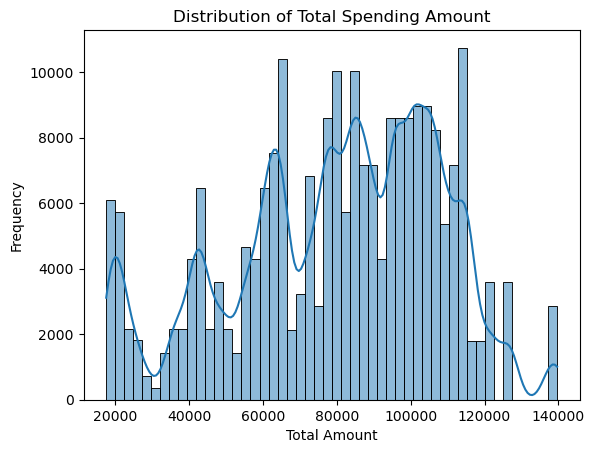

In [14]:
# Create a histogram to see the distribution of Total amount
sns.histplot(data=df_male, x='total_amt', kde=True, bins=50)
plt.title('Distribution of Total Spending Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

> Insights:
* Distribution Characteristics: The total_amt feature, representing total spending per customer, may exhibit a right-skewed distribution, where a majority of customers tend to have lower total spending amounts, and fewer customers contribute significantly higher amounts.
* High Spend Segmentation: The histogram with a KDE curve will highlight whether there is a clear distinction between high spenders and low spenders, which can be useful for clustering and targeting specific customer groups for marketing or loyalty programs.

> Considerations: 
* Customer Segmentation: Understanding the distribution of total spending can guide the segmentation of customers into high spenders and low spenders, enabling the marketing team to design personalized offers or loyalty incentives.
* Targeting Promotions: A large portion of the customer base might fall within a specific spending range, and it is important to determine if targeted promotions for both high and low spenders will be more effective than broad promotions.
* Behavioral Insights: The total spending behavior can help in understanding customer profiles and making strategic decisions on how to approach different segments for increased engagement or retention.

> Issues found: 
* Outliers: If there are extreme outliers in the total spending, they might distort the analysis. It’s essential to check for very high spending amounts that could skew the results or indicate data issues.
* Skewed Distribution: A highly skewed distribution may indicate that most customers are low spenders, with only a few contributing significantly to the total spend. This could make the analysis for certain segments (like high-value customers) more challenging without appropriate transformations (e.g., log-transformation).
* Data Gaps: Some customers might not have made many transactions, resulting in low or zero total spending. Understanding the reasons behind such low totals might require additional data (e.g., customer activity status).

<hr>

## D. Feature Selection


Feature selection executive summary:

In the feature selection process, the aim was to refine the dataset by retaining only the features that directly contribute to clustering customers based on their spending habits.
* PII Removal: Personal identifiable information (PII), such as credit card numbers, account numbers, and transaction identifiers, were removed to comply with privacy regulations and protect sensitive data.
* Irrelevant Features Dropped: Features like is_fraud, merch_lat, merch_long, and unix_time were deemed unnecessary for the clustering task, as they do not directly relate to customer spending patterns.
* Focus on Behavioral Features: The dataset was narrowed down to key behavioral features, including transaction amount, spending frequency, and activity patterns, which are essential for effective segmentation and customer clustering.
* The final selected features are: amt, category, merchant, amt_log, merchant_freq, trans_count, and total_amt. 

This feature selection approach ensures the dataset is both privacy-compliant and optimized for clustering analysis, allowing the model to focus on meaningful attributes that are critical for understanding customer spending behavior. 

### D.1 Approach- Behavioral Feature Selection for Spending Clustering

>Rationale:
* Privacy and Security: Dropping Personlly Identifiable Informations (e.g., cc_num, acct_num, trans_num) ensures compliance with privacy regulations and protects sensitive data.
* Irrelevance to Clustering: Features like is_fraud, merch_lat, merch_long, and unix_time don't contribute to clustering based on spending habits.
* Reduce Complexity: Removing irrelevant features simplifies the model and focuses on key attributes relevant to customer spending behavior.

In [15]:
# Check the columns present in dataset
df_male.columns

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'amt_log',
       'merchant_freq', 'total_amt', 'trans_count'],
      dtype='object')

In [16]:
# Drop personal identifiable information (PII) from the dataset
features_to_drop = ['cc_num','acct_num','trans_num','unix_time','is_fraud','merch_lat','merch_long']

# Drop the specified features from all datasets?
df_featured = df_male.drop(columns=features_to_drop)

>Results:
* The dataset has been cleaned by removing PII and non-contributory features.
* The remaining features are now centered around customer behavior, such as transaction amount (amt), spending patterns (amt_log, merchant_freq, total_amt), and customer activity (trans_count).
* This refined dataset is better suited for clustering analysis, allowing the model to focus on customer segmentation based on spending behavior.

### D.2 Final Selection of Features

In [17]:
# The final selected features are

features = ['amt', 'category','merchant','amt_log','merchant_freq','trans_count','total_amt']


<hr>

## E. Data Preparation

data_preparation_executive_summary:

In the data preparation phase, several key steps were performed to ensure that the dataset is clean, consistent, and ready for analysis.
* Standardization of Text Data: All categorical text-based features were standardized to lowercase, eliminating inconsistencies like different capitalizations of the same word (e.g., 'Yes' vs. 'yes'). This ensures uniformity and improves the quality of data for analysis and model training.
* Missing Values: The dataset was checked for missing values, and no missing data was found, ensuring that the dataset is complete and reliable for further analysis.
* Handling Duplicates: Duplicate values were identified and removed from the dataset, ensuring data integrity and preventing bias during the model training process.

These data cleaning steps ensure that the dataset is ready for clustering analysis, with consistent, complete, and unique data for further processing.

<hr>

### Copy Dataset

In [18]:
# Copy the datasets
df_cleaned= df_male[features].copy()

### E.1 Fixing "Data Standard"

> Rationale:  
* Inconsistent data formats, especially in categorical variables like strings (e.g., 'Yes' vs. 'yes'), can affect the performance of machine learning algorithms and skew analytical results.
* Standardizing text data (such as converting all text to lowercase) ensures consistency, improving the quality of data for analysis and model training.

In [19]:
# Standardize text data to lowercase
for i in df_cleaned.columns:
    if df_cleaned[i].dtype == 'object':
        df_cleaned[i] = df_cleaned[i].str.lower()

> Results: 
* All text-based categorical data were standardized to lowercase, ensuring uniformity across the dataset. This improves the model's ability to interpret and process categorical features correctly.

<hr>

### E.2 Fixing "Missing Values"

> Rationale: 
* Missing values can lead to inaccuracies in data analysis and model predictions. To ensure a complete dataset, missing values need to be handled either by imputation (filling with mean, median, or mode) or by removing the rows/columns with significant amounts of missing data. This helps improve data quality and ensures that model performance is not biased due to missing information.

In [20]:
# Check for the missing values
df_cleaned.isna().sum()


amt              0
category         0
merchant         0
amt_log          0
merchant_freq    0
trans_count      0
total_amt        0
dtype: int64

> Results: 
* The dataset has no missing data, ensuring completeness and reliability for further analysis.

<hr>

### E.3 Fixing "Duplicates Values"

> Rationale: 
* Duplicate values can skew the analysis by over-representing certain data points. Removing duplicates ensures that each observation is unique, providing an accurate and balanced dataset for analysis or model training.


In [21]:
# Check for the duplicate values
df_cleaned.duplicated().sum()

1

In [22]:
# Drop the duplicate values
df_cleaned.drop_duplicates(inplace=True)

In [23]:
# Check again to confirm the duplicates are dropped
df_cleaned.duplicated().sum()

0

> Results: 
* One duplicate value was found in the dataset and has been successfully dropped, ensuring data integrity and preventing any bias in the model development process.

<hr>

## F. Feature Engineering

feature_engineering_executive_summary:
* No new features were added in this notebook; all feature engineering was done in the EDA notebook.
* The focus here was on preparing and using the features created in the earlier phase, such as merchant_freq, , trans_count, and total_amt, for clustering customers based on their spending habits.
* These features were refined and are now ready for segmentation without additional modification.

<hr>

<hr>

## G. Data Preparation for Modeling

modeling_preparation_executive_summary:

Data preparation involved encoding categorical features and standardizing numerical features to make the dataset suitable for clustering models:
* Categorical Encoding: The category and merchant columns were transformed into numeric values using LabelEncoder, enabling effective processing by clustering algorithms.
* Feature Standardization: Numerical features were standardized to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally and improving model performance.

These steps ensure the data is ready for clustering, enhancing the model’s ability to identify distinct customer segments.

### G.1 Data Transformation: Encoding Categorical Features

> Rationale: 
* Categorical variables need to be encoded numerically for use in machine learning models, as algorithms cannot interpret string data.
* Encoding categorical features like category and merchant allows clustering models to incorporate these features, enhancing the model’s ability to identify transaction patterns.

In [24]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder for transforming categorical features
le = LabelEncoder()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

> Results: 
* Both category and merchant columns have been successfully transformed into numeric representations, making them compatible with the clustering model and improving the model’s capacity to handle these categorical inputs in identifying meaningful clusters.

<hr>

### G.2 Data Transformation: Standardization of Features

> Rationale: 
* Standardizing features scales numerical data to a consistent range, typically with a mean of 0 and a standard deviation of 1. This transformation is especially beneficial for clustering models like K-Means and distance-based algorithms, which rely on distance metrics.
* Scaling the data also helps improve the efficiency and convergence of many machine learning algorithms by eliminating differences in the magnitude of features, which can otherwise skew the model's calculations

In [25]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

> Results: 
* All numerical features have been standardized, meaning they now have a mean of 0 and a standard deviation of 1.
* This transformation ensures that each feature contributes equally in clustering calculations, improving the model's accuracy in detecting patterns and groupings within the data.

<hr>

## H. Assess Baseline Model

baseline_model_executive_summary:

* The baseline model, using MiniBatchKMeans clustering, effectively identified customer segments in the dataset with a silhouette score of 0.5537, which indicates reasonably well-defined clusters.
* This initial segmentation successfully distinguishes between key customer groups, such as high-spenders and low-spenders, by processing data in smaller batches to optimize speed and memory efficiency.

### H.1 Simulate Predictions with Baseline Model

> Rationale: 
* Using MiniBatchKMeans as a baseline model provides a quick and efficient way to identify clusters in large datasets by processing smaller, random data subsets, which reduces memory usage and speeds up convergence.
* This approach allows us to quickly detect key customer segments, such as high- and low-spenders, enabling fast initial insights that can guide further model refinement and business strategy.

In [26]:
# Import the model
from sklearn.cluster import MiniBatchKMeans

### H.2 Set Hyperparameters

In [27]:
# Set hyper parameters
n_clusters= np.arange(1,11)

### H.3 Fit the model

In [28]:
# Suppress specific warning
warnings.filterwarnings("ignore", message="MiniBatchKMeans is known to have a memory leak on Windows with MKL")

In [29]:
# Fit the model for each parameter value
inertia = []
for i in range(1, 11):
    minikmeans = MiniBatchKMeans(n_clusters=i, random_state=42,batch_size=50000)
    minikmeans.fit(df_scaled)
    inertia.append(minikmeans.inertia_)


Text(0, 0.5, 'Inertia')

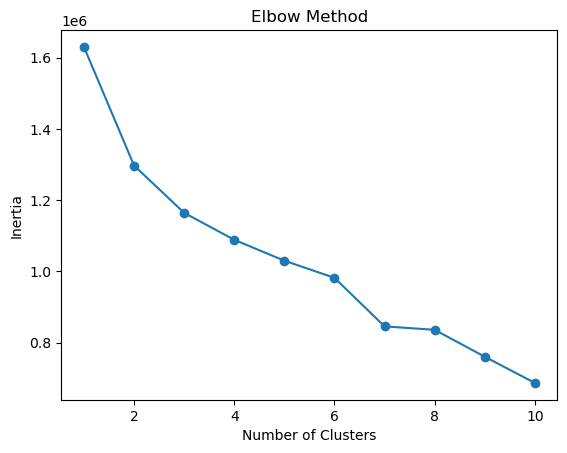

In [30]:
# Plot the line chart 
plt.plot(range(1, 11), inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
# Define the number of clusters for the best baseline model
n_clusters = 2

# Initialize the MiniBatchKMeans model
baseline_model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42,batch_size=50000)

# Fit the model
baseline_model.fit(df_scaled)

# Predict the clusters
df_cleaned['minikmeans'] = baseline_model.predict(df_scaled)

### H.4 Selection of Performance Metrics

> Rationale:
* The silhouette score is used as a performance metric because it evaluates how well clusters are defined by measuring the separation between clusters and cohesion within clusters.
* A high silhouette score indicates that clusters are well-separated, which is essential for meaningful segmentation in applications like customer spending analysis.
* It’s an effective metric for assessing clustering quality, ensuring that similar customers are grouped together while distinct groups remain separate.

In [32]:
# Import the performance metrices
from sklearn.metrics import silhouette_score

### H.5 Baseline Model Performance

In [ ]:
# Evaluate the baseline model using silhouette score
sil_score = silhouette_score(df_cleaned, df_cleaned['minikmeans'])
print(f"Silhouette Score for Baseline Model: {sil_score}")

Silhouette Score for Baseline Model: 0.5537467740674836


In [34]:
import matplotlib as mpl

# Increase the max number of open figures
mpl.rcParams['figure.max_open_warning'] = 50  

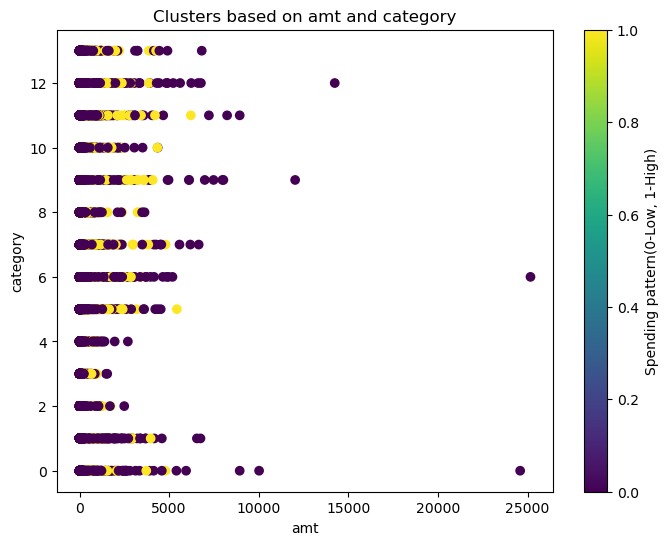

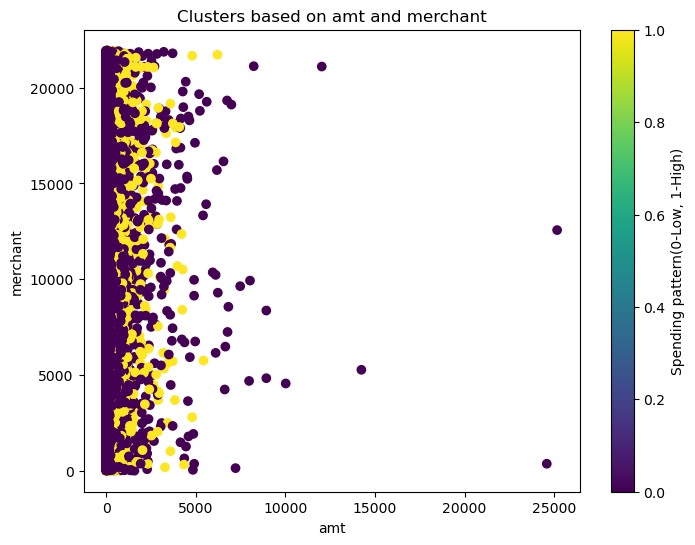

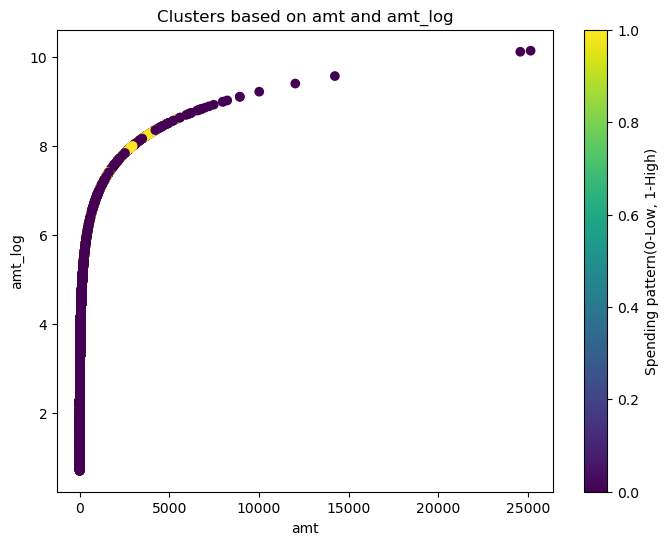

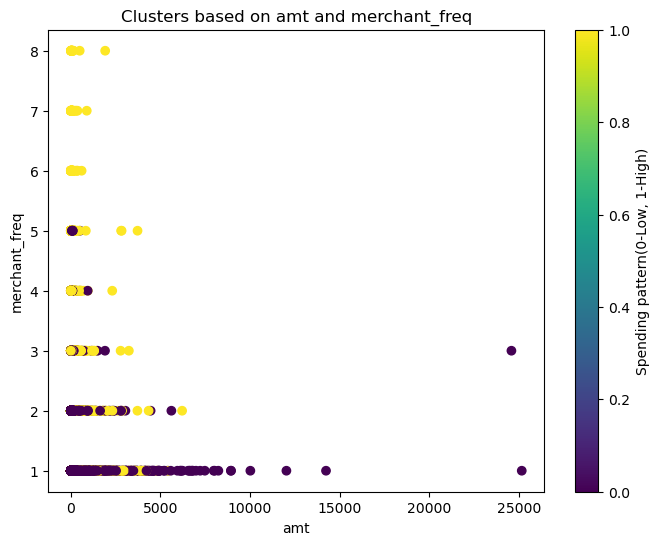

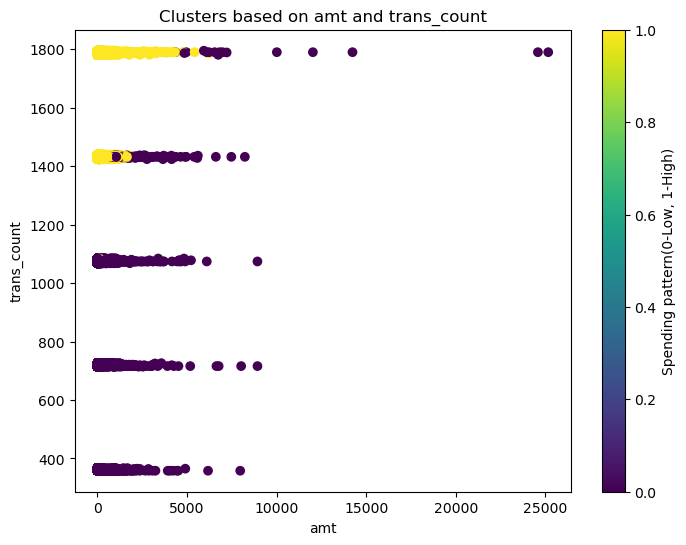

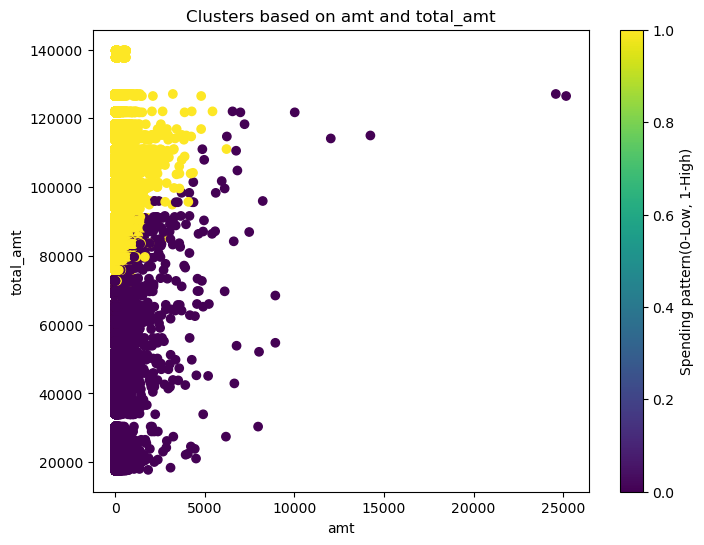

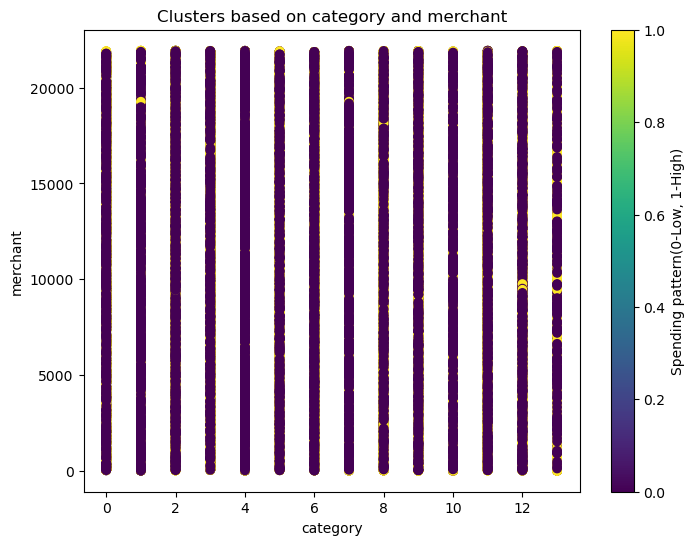

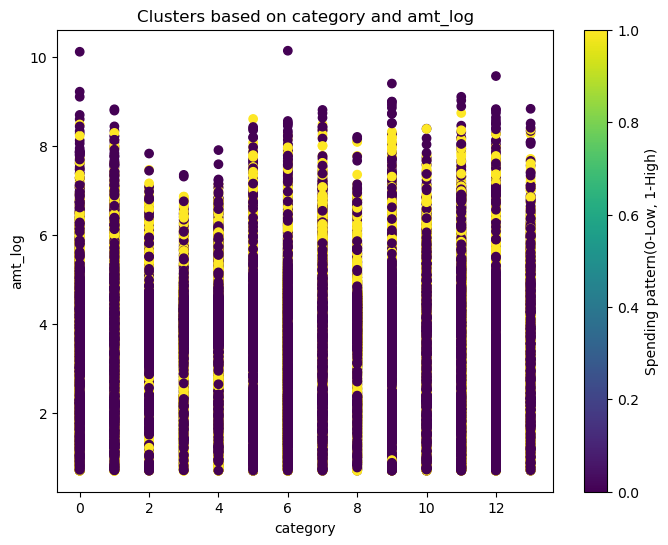

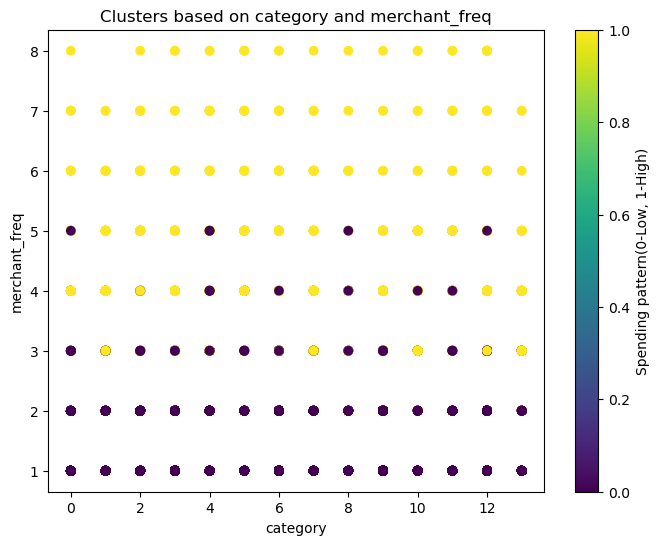

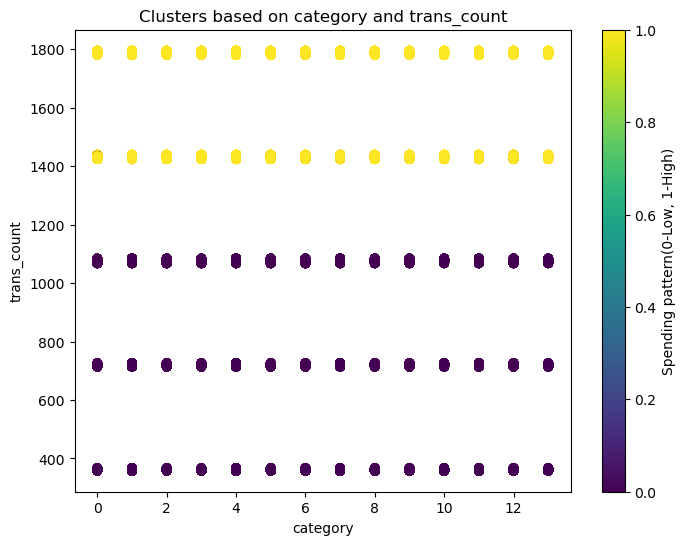

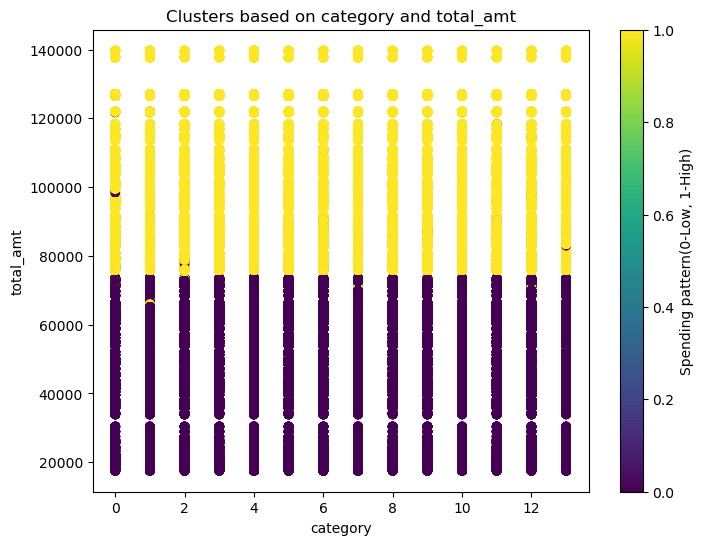

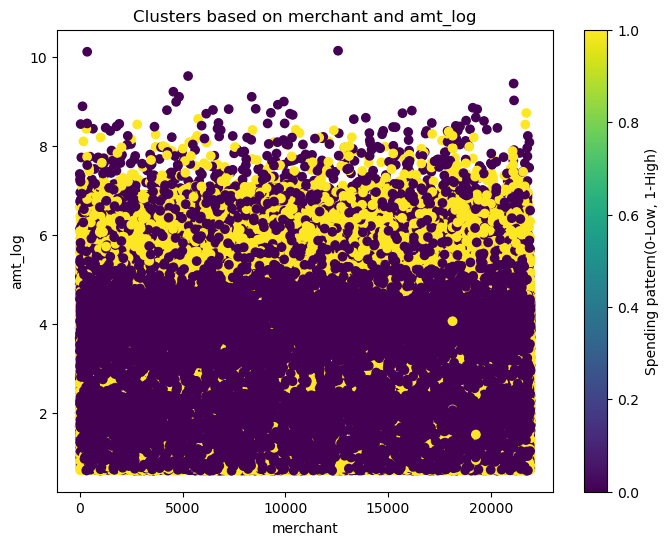

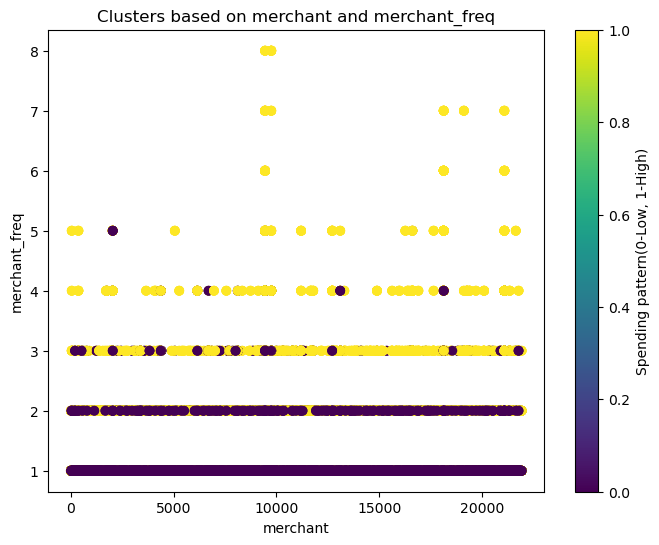

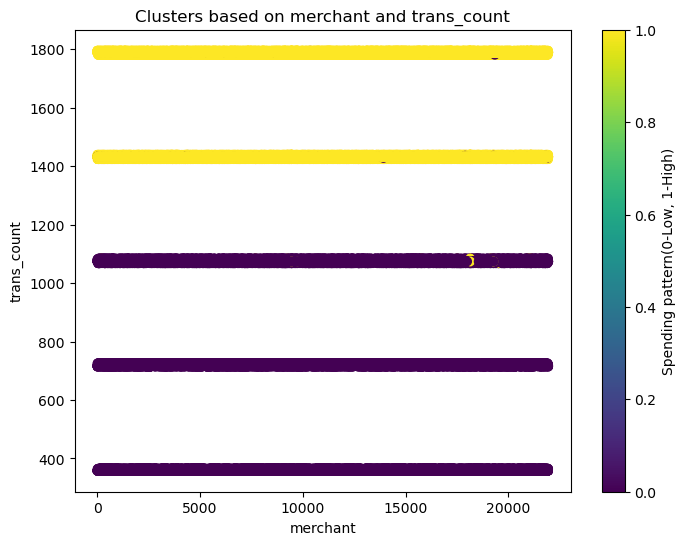

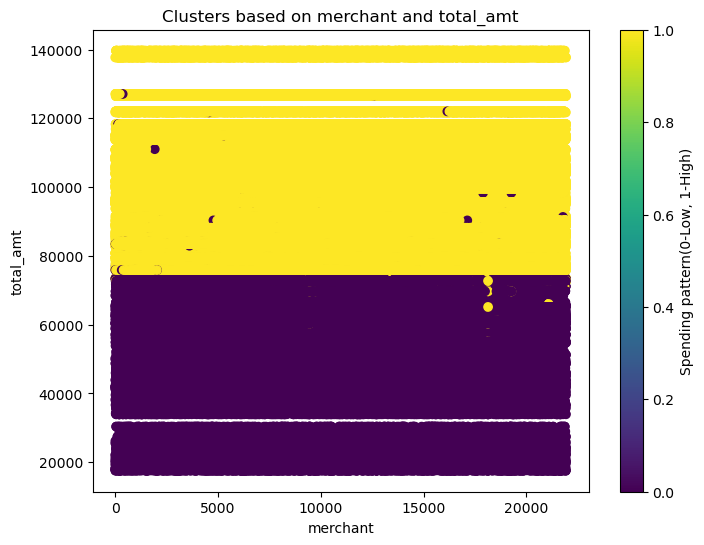

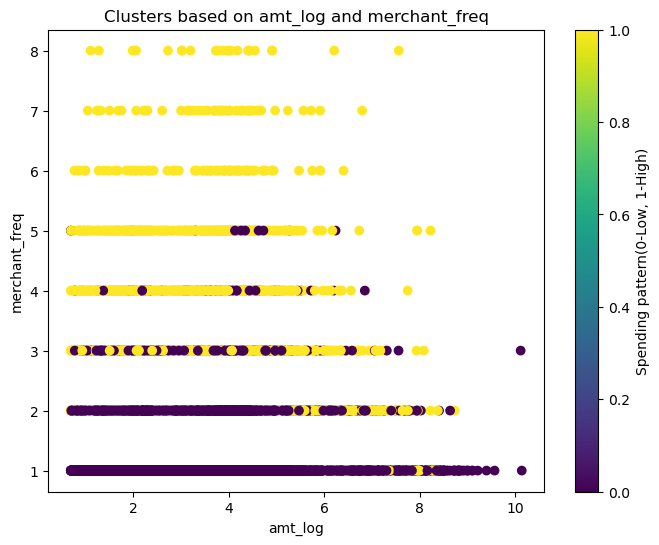

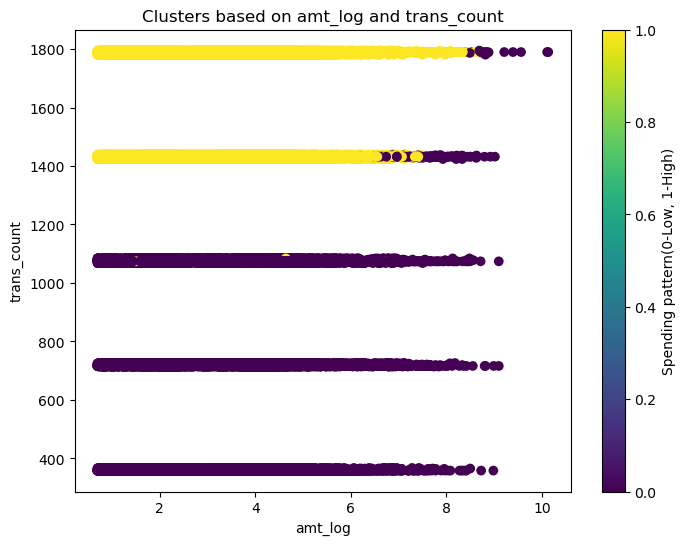

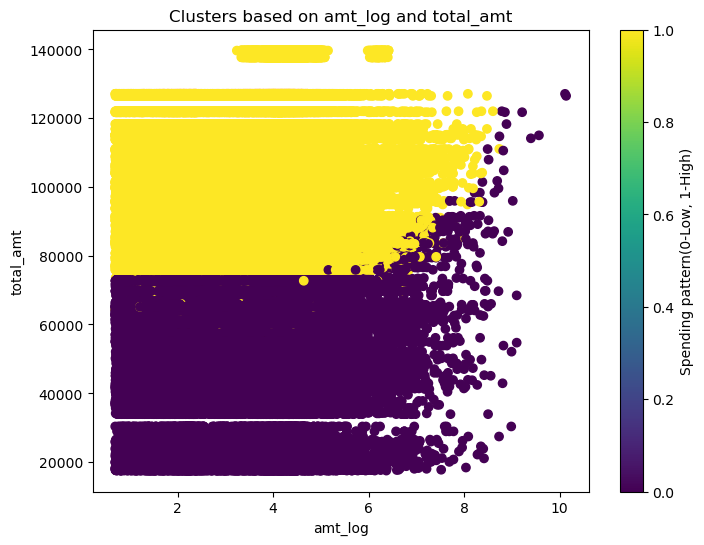

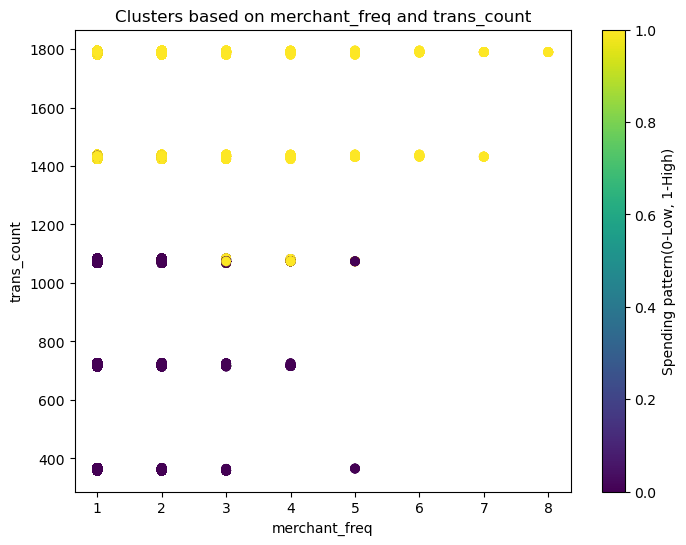

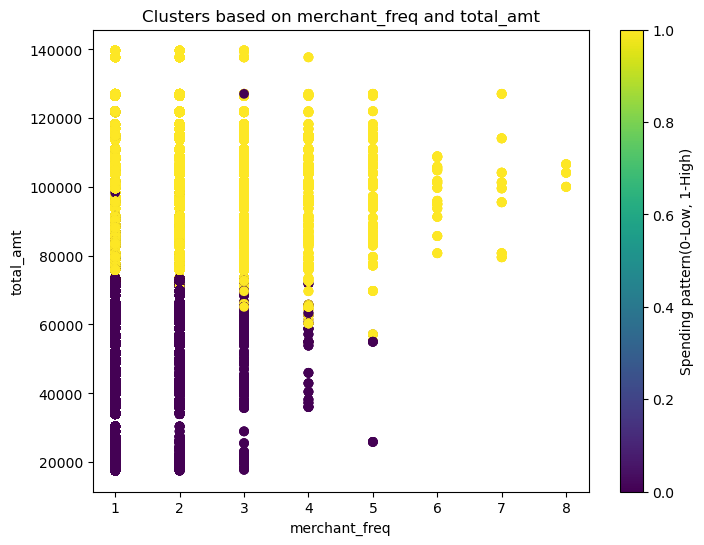

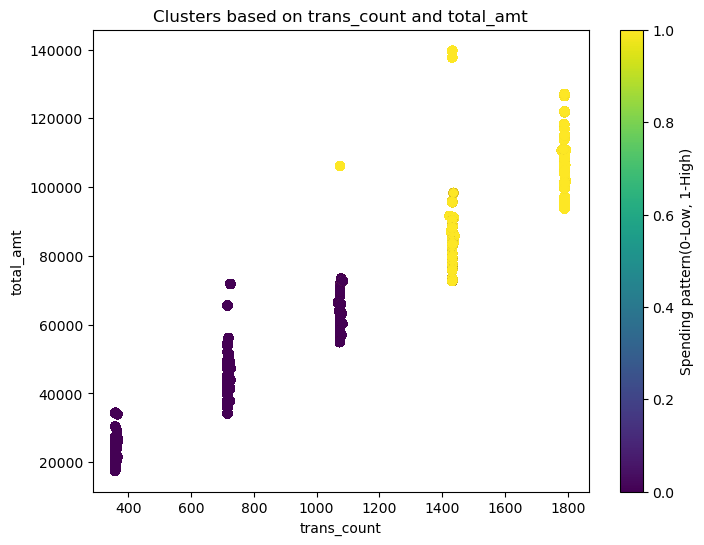

In [52]:
# Plot the scatterplots to view the clustering results
for i in range(len(features)):
    for j in range(i + 1, len(features)):
      plt.figure(figsize=(8, 6))
      plt.scatter(df_cleaned[features[i]], df_cleaned[features[j]], c=df_cleaned['minikmeans'], cmap='viridis')
      plt.xlabel(features[i])
      plt.ylabel(features[j])
      plt.title(f'Clusters based on {features[i]} and {features[j]}')
      plt.colorbar(label='Spending pattern(0-Low, 1-High)')

> Results: 
* The baseline model, using MiniBatchKMeans clustering, achieved a silhouette score of 0.5537.
* This score indicates moderately well-defined clusters, suggesting that the model has captured a fair degree of separation between customer segments while maintaining cohesion within each cluster.
* A silhouette score above 0.5 is generally considered good, implying that the clustering model has successfully differentiated high-spending and low-spending customer groups.

## I. Train Machine Learning Model

train_model_executive_summary :

The KMeans clustering model was applied to segment customers based on their spending habits. The model utilized two clusters (Low Spenders and High Spenders) to categorize the customer base, leveraging features such as transaction count, total amount spent, and merchant engagement.

* Key Findings:
    * Silhouette Score: The model achieved a silhouette score of 0.5553, indicating that the clusters are moderately well-defined with reasonable separation between groups.
    * Cluster 0 (Low Spenders): Customers in this segment show lower transaction frequencies and lower overall spending.
    * Cluster 1 (High Spenders): Customers in this group exhibit frequent transactions and higher spending, representing a more loyal and high-value customer base.
    * Cluster Sizes: Cluster 1 (High Spenders) includes 147,660 customers, while Cluster 0 (Low Spenders) includes 85,216 customers.
* Business Impact:
    * Targeted Marketing: With clearly defined high- and low-spending segments, businesses can create tailored campaigns, such as exclusive offers for high-value customers and promotions to increase engagement among low-spenders.
    * Resource Allocation: Resources can be focused on high-value segments, ensuring maximum return on marketing and sales efforts.
    * Customer Retention: The segmentation allows for the implementation of targeted retention strategies, such as loyalty programs for high spenders, which could improve customer lifetime value.
    * Product Customization: Businesses can personalize recommendations for each segment, improving customer experience and satisfaction.
    * Operational Efficiency: Insights from the model can guide inventory and supply chain decisions by understanding demand patterns specific to each segment.

Overall, the KMeans clustering model provides valuable insights for customer segmentation, enabling more effective business strategies for targeted engagement, resource allocation, and operational optimization.


### I.1 Import Algorithm

> Rationale: 
* KMeans clustering is ideal for customer segmentation based on spending habits because it efficiently groups customers with similar behaviors, is scalable to large datasets, and provides clear, interpretable segments.
* This enables businesses to create targeted marketing strategies and personalized offers for different customer groups.

In [36]:
# Import the Kmeans
from sklearn.cluster import KMeans

<hr>

### I.2 Set Hyperparameters

> Rationale: 
* The range of n_clusters = np.arange(1, 11) is chosen to explore different cluster sizes and identify the optimal number of clusters.
* Testing with 1 to 10 clusters helps to capture the point where the model begins to exhibit diminishing returns in terms of improving cluster quality, which can be used for selecting the best number of clusters.

In [37]:
# Set the hyperparameters
n_clusters= np.arange(1,11)

<hr>

### I.3 Fit Model

In [ ]:
# fit the model with each parameter values
inertia = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

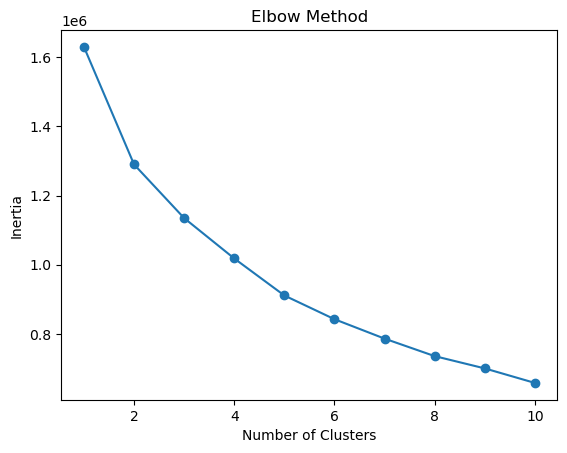

In [ ]:
# plot a line chart 
plt.plot(n_clusters, inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [40]:
# Define the number of clusters for the best model
n_clusters = 2

# Initialize the KMeans model
model = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)

# Fit the model
model.fit(df_scaled)

# Predict the clusters
df_cleaned['kmeans'] = model.predict(df_scaled)

<hr>

### I.4 Model Technical Performance

In [41]:
# Import the performance metrices
from sklearn.metrics import silhouette_score

In [42]:
# Evaluate the baseline model using silhouette score
sil_score = silhouette_score(df_cleaned, df_cleaned['kmeans'])
print(f"Silhouette Score for Best Model: {sil_score}")


Silhouette Score for Best Model: 0.5553146090288568


In [43]:
import matplotlib as mpl

# Increase the max number of open figures
mpl.rcParams['figure.max_open_warning'] = 50 

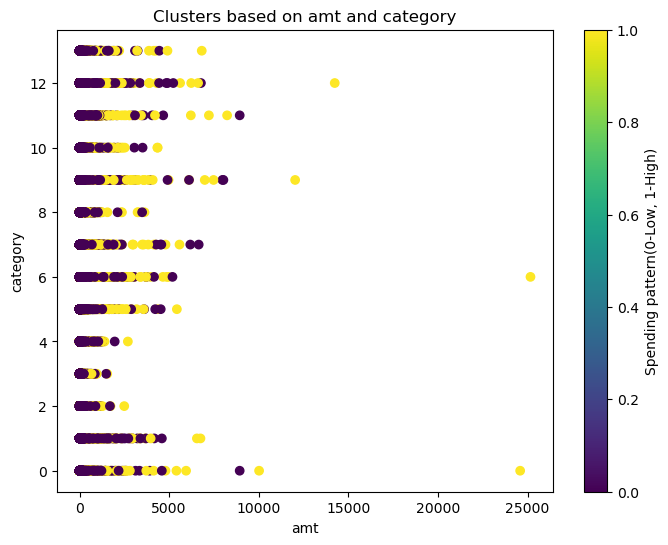

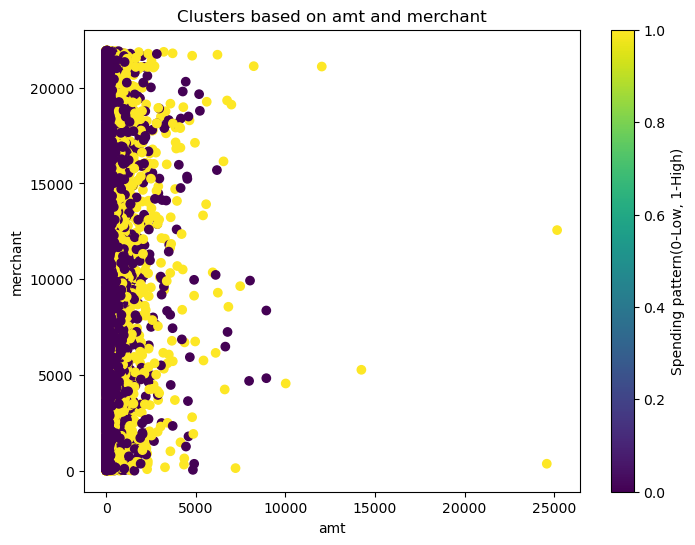

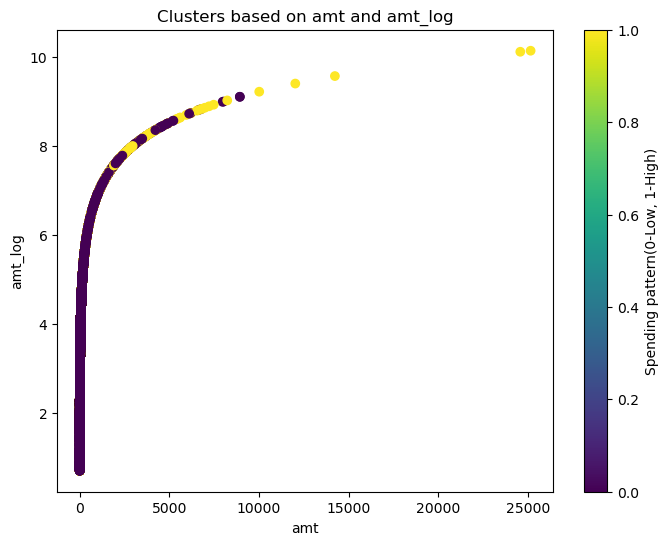

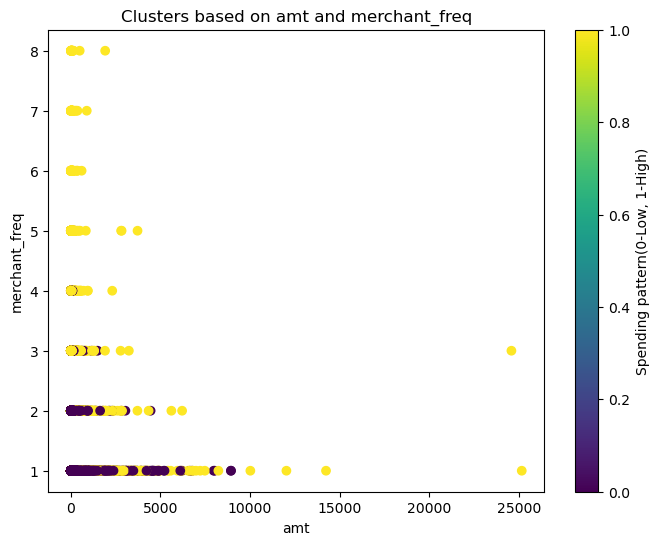

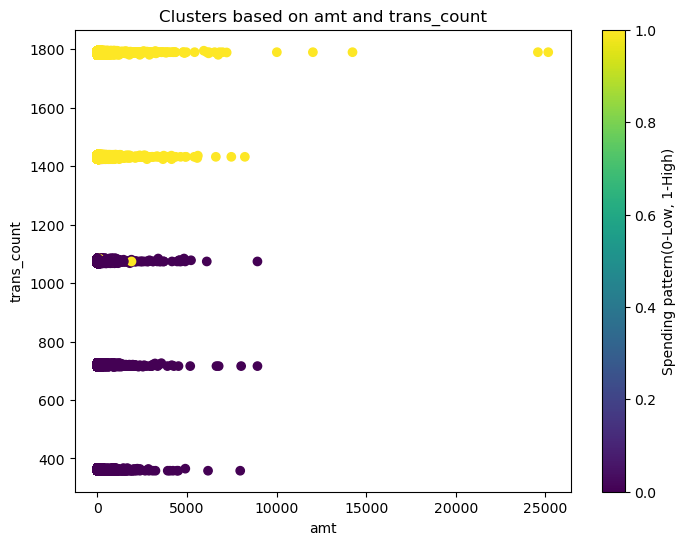

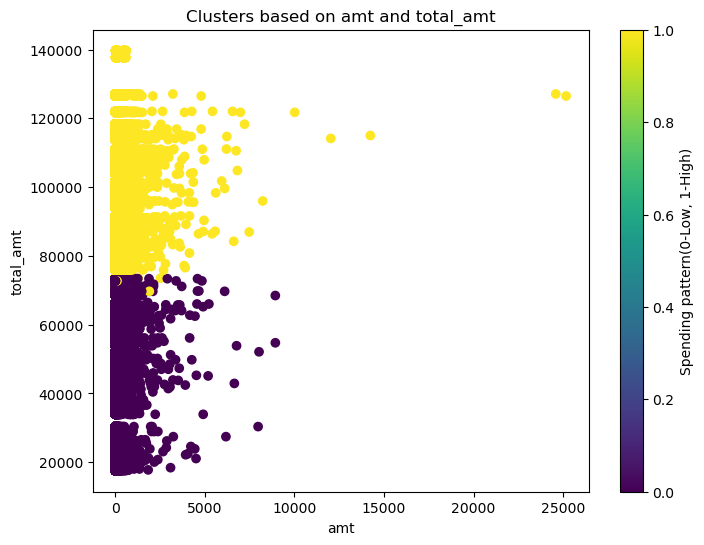

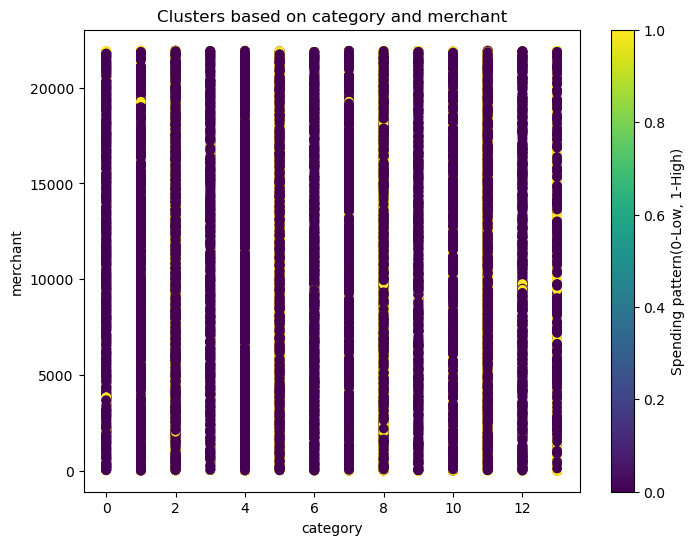

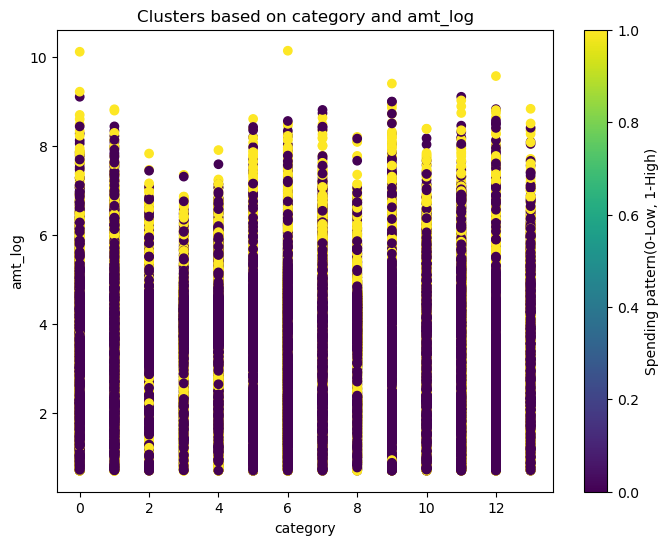

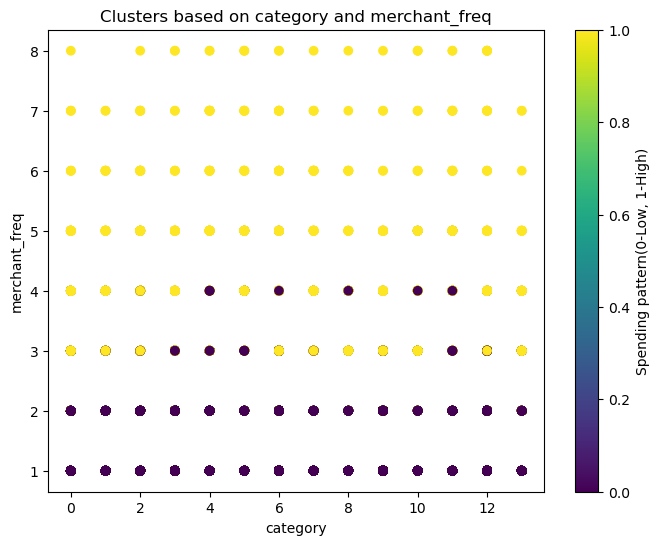

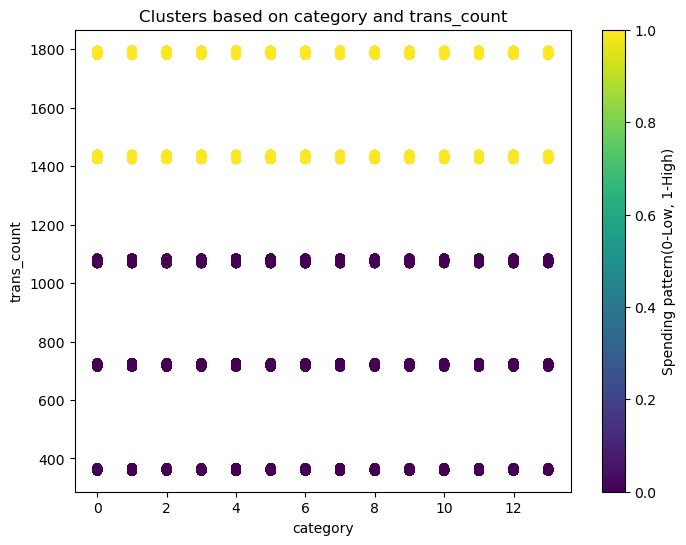

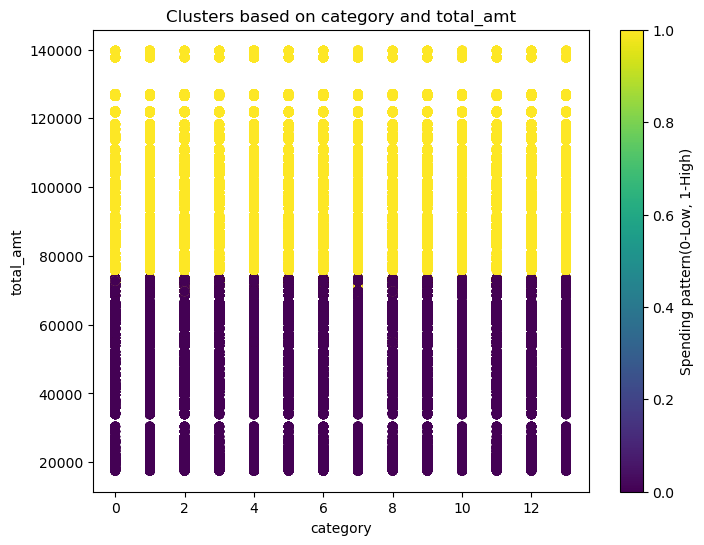

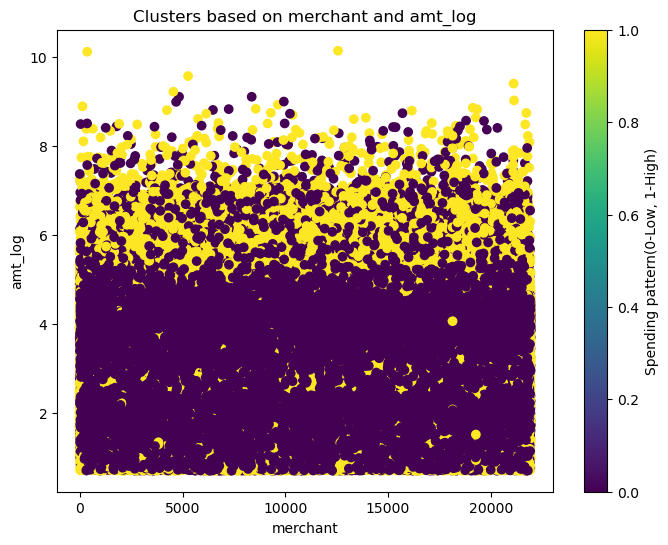

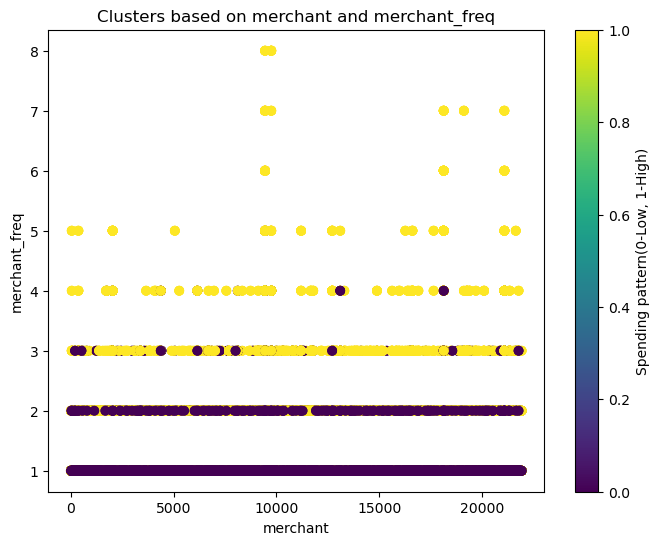

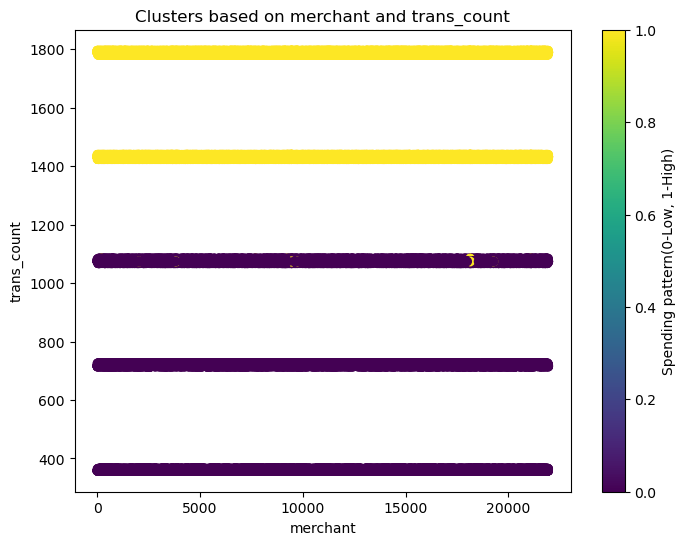

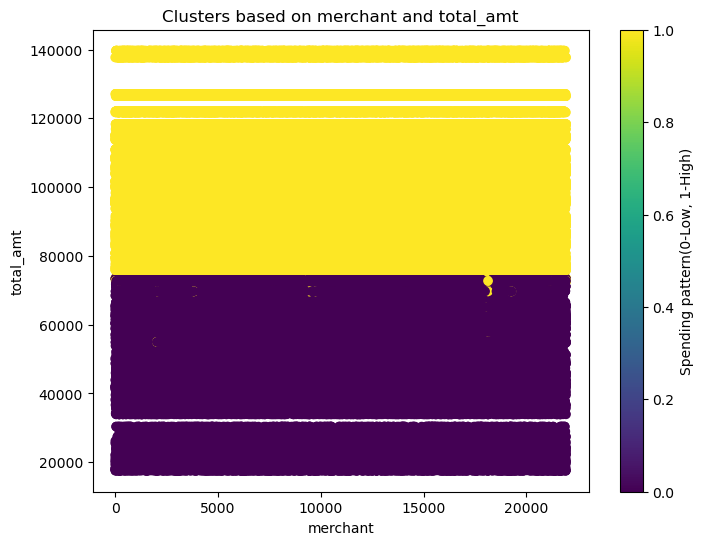

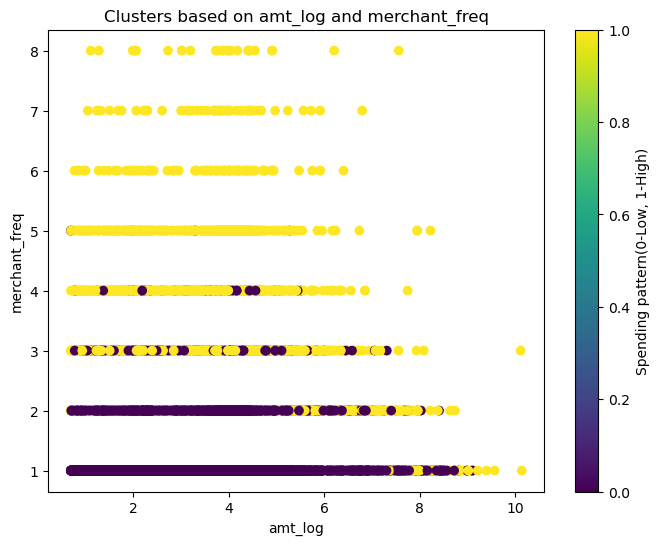

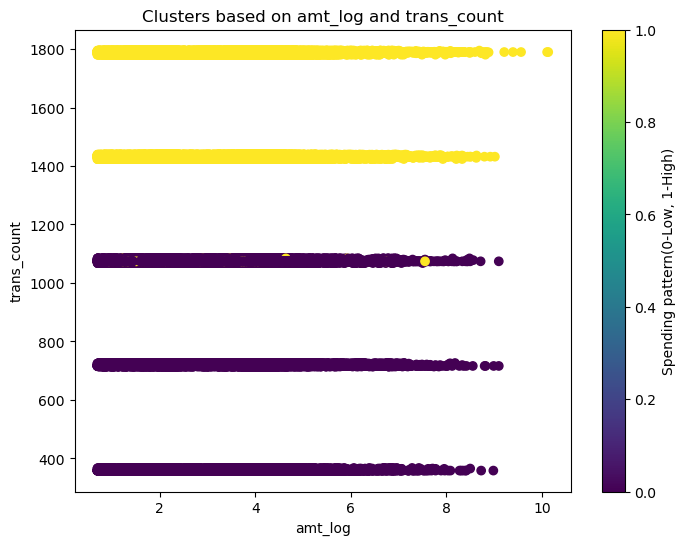

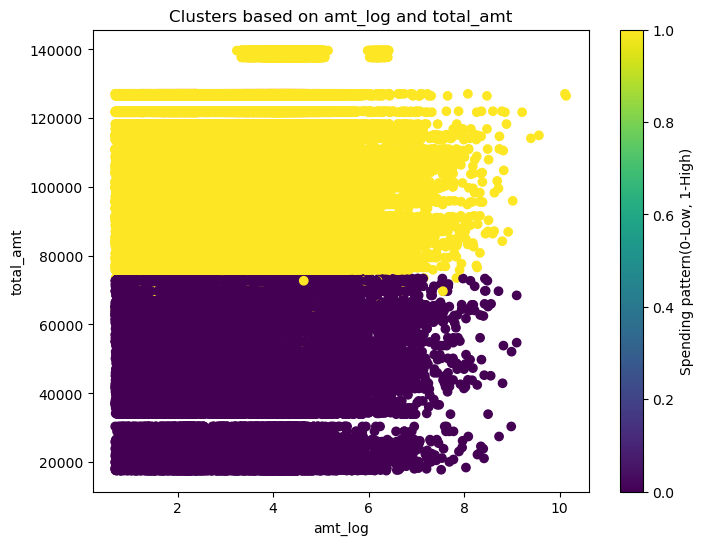

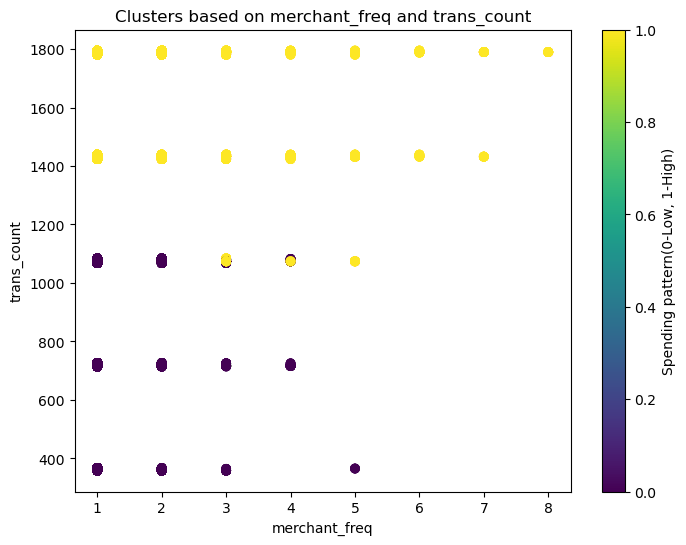

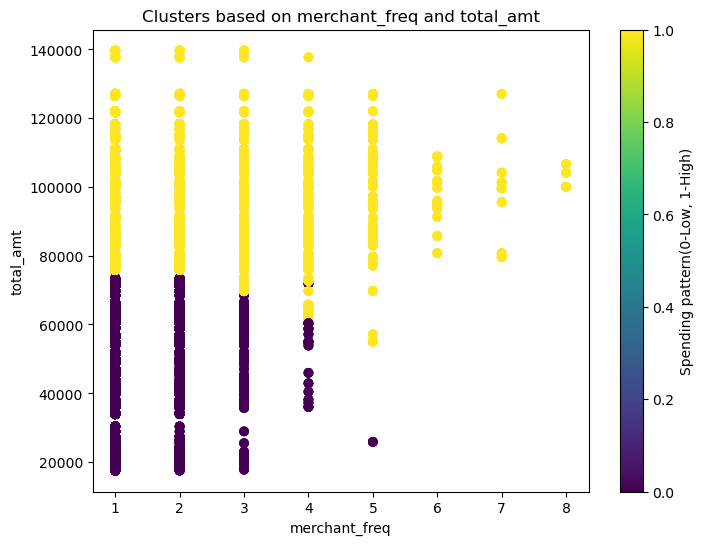

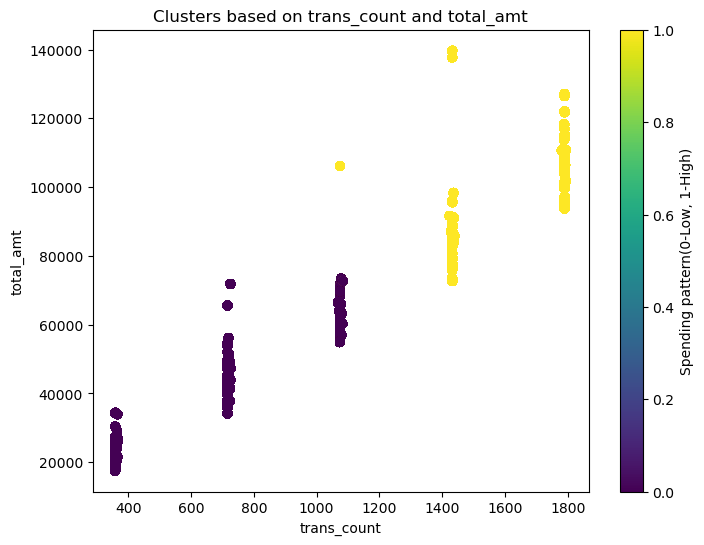

In [51]:
 # Plot the scatter plots to view the results of clustering
for i in range(len(features)):
    for j in range(i + 1, len(features)):
      plt.figure(figsize=(8, 6))
      plt.scatter(df_cleaned[features[i]], df_cleaned[features[j]], c=df_cleaned['kmeans'], cmap='viridis')
      plt.xlabel(features[i])
      plt.ylabel(features[j])
      plt.title(f'Clusters based on {features[i]} and {features[j]}')
      plt.colorbar(label='Spending pattern(0-Low, 1-High)')

> Results: 
* Silhouette Score for Best Model: 0.5553
* Interpretation: The silhouette score of 0.5553 indicates that the clusters formed by the KMeans model are moderately well-defined. A score above 0.5 suggests that the clusters are reasonably distinct from one another while maintaining cohesion within each group.
* This score implies that the model has effectively captured customer segments based on their spending habits, distinguishing high-spenders from low-spenders with a decent degree of separation. While the score suggests room for improvement, it is a positive indication that the model provides useful insights for customer segmentation.

<hr>

### I.5 Business Impact from Current Model Performance

In [45]:
# Output cluster centers and sizes
print("Cluster Centers (Mean Feature Values):")
print(df_cleaned.groupby('kmeans')[features].mean())
print("\nCluster Sizes:")
print(df_cleaned['kmeans'].value_counts())

Cluster Centers (Mean Feature Values):
              amt  category      merchant   amt_log  merchant_freq  \
kmeans                                                               
0       60.792880  6.006994  11013.378438  3.339598       1.078600   
1       60.228131  5.977421  11060.763247  3.340910       1.174096   

        trans_count     total_amt  
kmeans                             
0        809.789371  48917.303506  
1       1624.311987  97610.094129  

Cluster Sizes:
kmeans
1    147660
0     85216
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x122be75d790>,
 [Text(1, 0, '1'), Text(0, 0, '0')])

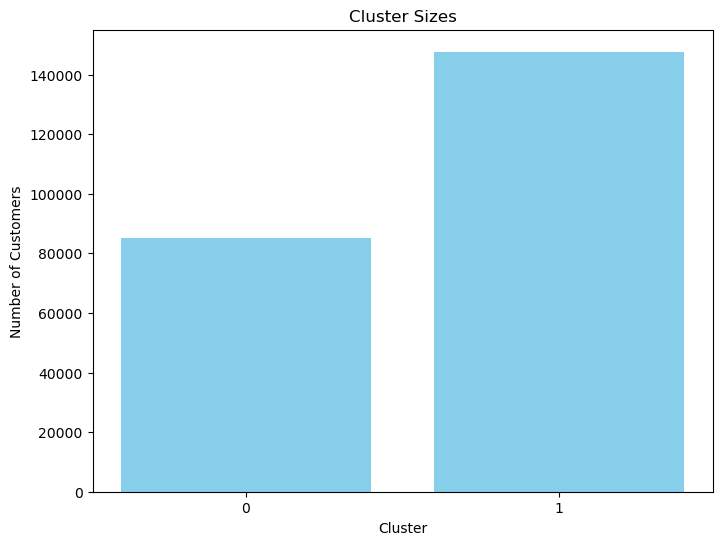

In [46]:
#Bar Chart for Cluster Sizes
plt.figure(figsize=(8, 6))
cluster_sizes = df_cleaned['kmeans'].value_counts()
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(cluster_sizes.index)

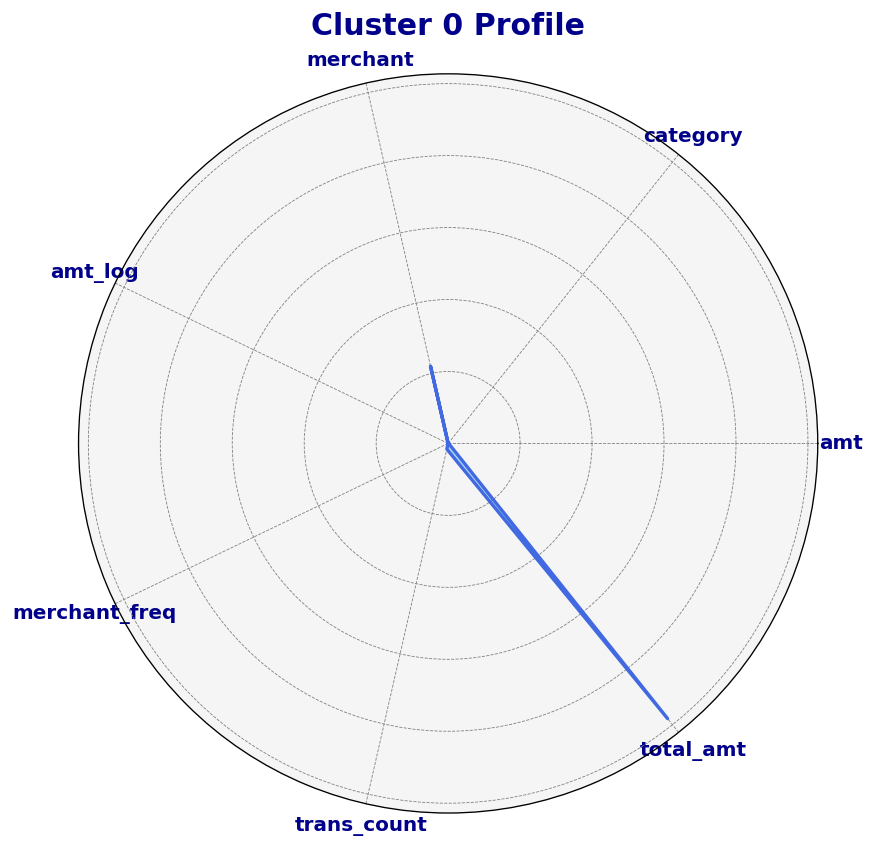

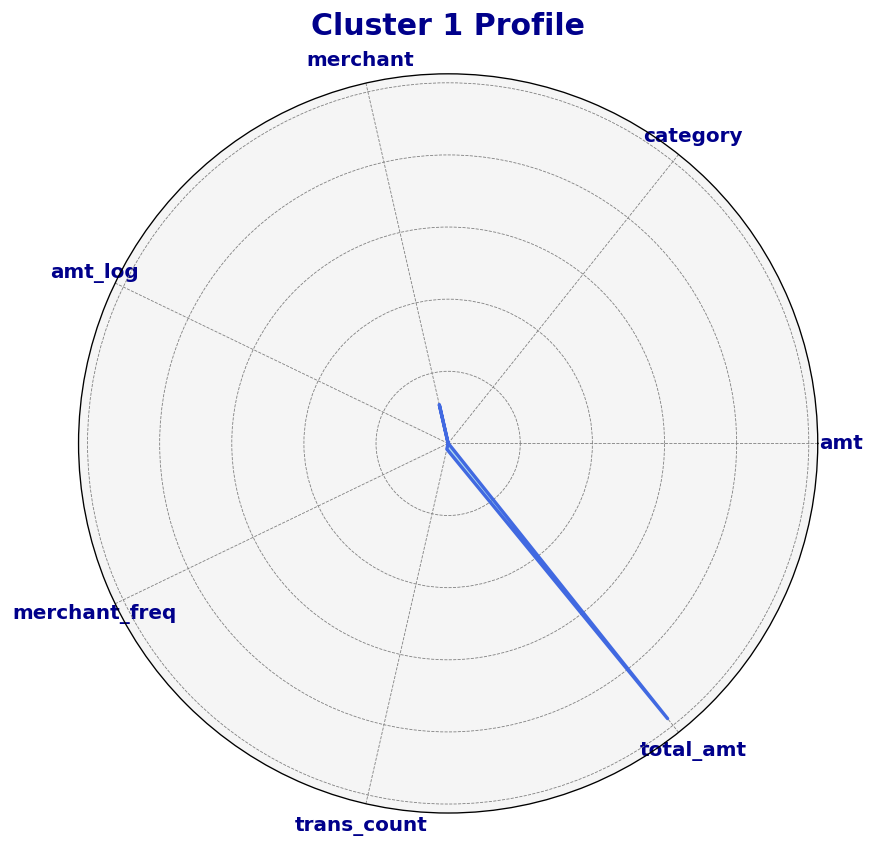

In [53]:
# Improved radar chart function without value annotations
def radar_chart(data, title, labels):
    num_vars = len(data)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data = data.tolist()
    data += data[:1]  
    angles += angles[:1]  

    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), dpi=120, subplot_kw=dict(polar=True))
    
    # Customize the radar chart's background color
    ax.set_facecolor('whitesmoke')
    
    # Plot the radar chart
    ax.fill(angles, data, color='skyblue', alpha=0.6)
    ax.plot(angles, data, color='royalblue', linewidth=2)
    
    # Adjust ticks and labels for better readability
    ax.set_yticklabels([])  
    ax.set_xticks(angles[:-1])
    
    # Adjust the angle and size of labels to avoid overlap
    ax.set_xticklabels(labels, fontsize=12, fontweight='bold', color='darkblue', ha='center', rotation=45)
    
    # Customize gridlines and radial ticks
    ax.grid(linewidth=0.5, linestyle='--', color='grey')
    
    # Title and other text elements
    ax.set_title(title, size=16, color='darkblue', weight='bold', va='bottom', fontsize=18)

cluster_centers = df_cleaned.groupby('kmeans')[features].mean()

# Plot radar charts for each cluster with improved styling
for cluster in cluster_centers.index:
    radar_chart(cluster_centers.loc[cluster], f'Cluster {cluster} Profile', features)


> Results: 
* Cluster 0 (Low Spenders): Customers in this group exhibit lower spending, fewer transactions, and a relatively lower total expenditure. This segment may represent budget-conscious customers, occasional buyers, or those with limited engagement.
* Cluster 1 (High Spenders): Customers in this segment have higher transaction frequency and significantly higher spending. This group is likely to represent loyal, high-value customers who are key to driving revenue and profitability.
* Targeted Marketing: Allows for tailored marketing strategies, e.g., exclusive offers for high spenders and promotions for low spenders to boost engagement.
* Resource Allocation: Helps prioritize high-spending customers, focusing marketing and resources where they generate the most revenue.
* Product Customization: Enables personalized product recommendations based on spending behavior, improving customer satisfaction.
* Customer Retention: Identifies segments for targeted retention strategies, such as loyalty programs for high-value customers.
* Operational Efficiency: Optimizes inventory and supply chain management by understanding customer demand patterns.

<hr>

## J. Final Outcomes

> Key Learnings:
* Customer Segmentation: The use of KMeans clustering has effectively segmented customers into two key groups—Low Spenders and High Spenders—based on their spending behavior, providing actionable insights for targeted business strategies.
* Cluster Quality: The silhouette score of 0.5553 indicates moderately well-defined clusters, suggesting that the model successfully differentiated between the two segments while maintaining cohesion within each group.
* Behavioral Patterns: High spenders are more frequent and higher-value customers, while low spenders exhibit less engagement. This segmentation provides insights into customer loyalty and spending patterns, critical for personalized marketing.
* Visualization: The use of scatter charts and bar charts helped visually distinguish between the clusters, making it easier to understand the distinct characteristics of each group.

> Recommendations: 
* Expand Segmentation: Consider increasing the number of clusters beyond two (e.g., introducing a "Medium Spender" segment) to refine customer groups further and enable more tailored marketing strategies.
* Advanced Clustering Techniques: Explore advanced clustering algorithms, such as DBSCAN or Hierarchical Clustering, to uncover more complex patterns or outliers that might not be captured by KMeans.
* Cluster Re-Evaluation: Regularly re-evaluate the clustering model to account for changes in consumer behavior, market trends, and external factors (e.g., economic changes, seasonality), ensuring that the segmentation continues to meet business objectives.
* Incorporate Additional Features: To improve segmentation accuracy, include additional behavioral features such as frequency of purchase, customer interaction with the brand, or product preferences. This will allow for a more comprehensive understanding of customer behavior.

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a425463-7d70-48a4-ba8a-cc6d45d6eab2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>